# Klassifikation mit Support Vektor Maschinen

In [1]:
import os
import sys
import math
import time
import numpy as np

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Utils.data_preparation_helper import load_data_for_classification, prepare_data
from Utils.data_evaluation_helper import parse_classification_report, report_to_latex_table

c:\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
random_seed = 42

In [4]:
def print_confusion_matrix_colored(confusion_matrix, c_labels, xy_labelsize, c_labelsize, save=None):
    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(111)
    #ax.set_title('Classification report')
    ax.set_xlabel('prädizierte Klasse', fontsize=xy_labelsize, labelpad=12)
    ax.xaxis.tick_top()
    ax.set_xticks(list(range(len(c_labels))))
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticklabels(c_labels, fontsize=c_labelsize, rotation=90)

    ax.set_ylabel('tatsächliche Klasse', fontsize=xy_labelsize)
    ax.yaxis.set_ticklabels(c_labels, fontsize=c_labelsize)
    ax.set_yticks(list(range(len(c_labels))))

    img = ax.imshow(confusion_matrix, cmap='gray')
    cbar = fig.colorbar(img)
    cbar.ax.tick_params(labelsize=c_labelsize)
    fig.tight_layout()
    if save != None:
        fig.savefig(save)
    plt.show()

## Auswertung der optimalen Parameter - own

In [33]:
#(1.0, 5, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'})
#(0.92307692307692313, 10, {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.86538461538461542, 3, {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.78846153846153844, 11, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'})

acc_frames = 5
acc_C = 1000
acc_kernel = 'rbf'
acc_decfunc = 'ovo'

gyro_frames = 10
gyro_C = 100
gyro_kernel = 'linear'
gyro_decfunc = 'ovo'

ori_frames = 3
ori_C = 100
ori_kernel = 'linear'
ori_decfunc = 'ovo'

emg_frames = 11
emg_C = 1000
emg_kernel = 'rbf'
emg_decfunc = 'ovo'

In [6]:
start_time = time.time()

train, valid, test = load_data_for_classification('own')

acc_train_input, acc_train_label = prepare_data(train, acc_frames, 'accelerometer', verbose=False)
acc_valid_input, acc_valid_label = prepare_data(valid, acc_frames, 'accelerometer', verbose=False)
acc_test_input, acc_test_label = prepare_data(test, acc_frames, 'accelerometer', verbose=False)
print('Accelerometer data prepared')

gyro_train_input, gyro_train_label = prepare_data(train, gyro_frames, 'gyro', verbose=False)
gyro_valid_input, gyro_valid_label = prepare_data(valid, gyro_frames, 'gyro', verbose=False)
gyro_test_input, gyro_test_label = prepare_data(test, gyro_frames, 'gyro', verbose=False)
print('Gyroscope data prepared')

ori_train_input, ori_train_label = prepare_data(train, ori_frames, 'orientation', verbose=False)
ori_valid_input, ori_valid_label = prepare_data(valid, ori_frames, 'orientation', verbose=False)
ori_test_input, ori_test_label = prepare_data(test, ori_frames, 'orientation', verbose=False)
print('Orientation data prepared')

emg_train_input, emg_train_label = prepare_data(train, emg_frames, 'emg', verbose=False)
emg_valid_input, emg_valid_label = prepare_data(valid, emg_frames, 'emg', verbose=False)
emg_test_input, emg_test_label = prepare_data(test, emg_frames, 'emg', verbose=False)
print('EMG data prepared')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer data prepared
Gyroscope data prepared
Orientation data prepared
EMG data prepared

Duration: 26.17411494255066


In [7]:
start_time = time.time()

acc_svm = svm.SVC(C=acc_C, kernel=acc_kernel, decision_function_shape=acc_decfunc, random_state=random_seed, probability=True)
acc_svm.fit(np.append(acc_train_input, acc_valid_input, axis=0), np.append(acc_train_label, acc_valid_label))
print('Accelerometer classifier fitted')

gyro_svm = svm.SVC(C=gyro_C, kernel=gyro_kernel, decision_function_shape=gyro_decfunc, random_state=random_seed, probability=True)
gyro_svm.fit(np.append(gyro_train_input, gyro_valid_input, axis=0), np.append(gyro_train_label, gyro_valid_label))
print('Gyroscope classifier fitted')

ori_svm = svm.SVC(C=ori_C, kernel=ori_kernel, decision_function_shape=ori_decfunc, random_state=random_seed, probability=True)
ori_svm.fit(np.append(ori_train_input, ori_valid_input, axis=0), np.append(ori_train_label, ori_valid_label))
print('Orientation classifier fitted')

emg_svm = svm.SVC(C=emg_C, kernel=emg_kernel, decision_function_shape=emg_decfunc, random_state=random_seed, probability=True)
emg_svm.fit(np.append(emg_train_input, emg_valid_input, axis=0), np.append(emg_train_label, emg_valid_label))
print('EMG classifier fitted')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer classifier fitted
Gyroscope classifier fitted
Orientation classifier fitted
EMG classifier fitted

Duration: 0.23606109619140625


In [35]:
frame_config ={'acc_frames':acc_frames, 'gyro_frames':gyro_frames, 'ori_frames':ori_frames, 'emg_frames':emg_frames}

save_path = '../Data/models/svm/'
os.makedirs(save_path, exist_ok=True)

#joblib.dump(acc_svm, save_path + 'own_acc_svm.p')
#joblib.dump(gyro_svm, save_path + 'own_gyro_svm.p')
#joblib.dump(ori_svm, save_path + 'own_ori_svm.p')
#joblib.dump(emg_svm, save_path + 'own_emg_svm.p')

joblib.dump(frame_config, save_path + 'own_frame_config.p')

acc_svm = joblib.load(save_path + 'own_acc_svm.p')
gyro_svm = joblib.load(save_path + 'own_gyro_svm.p')
ori_svm = joblib.load(save_path + 'own_ori_svm.p')
emg_svm = joblib.load(save_path + 'own_emg_svm.p')

frame_config = joblib.load(save_path + 'own_frame_config.p')

{'acc_frames': 5, 'gyro_frames': 10, 'ori_frames': 3, 'emg_frames': 11}


In [11]:
start_time = time.time()

acc_pred_probs = acc_svm.predict_proba(acc_test_input)
gyro_pred_probs = gyro_svm.predict_proba(gyro_test_input)
ori_pred_probs = ori_svm.predict_proba(ori_test_input)
emg_pred_probs = emg_svm.predict_proba(emg_test_input)

if (np.array_equal(acc_svm.classes_, gyro_svm.classes_) and 
    np.array_equal(gyro_svm.classes_, ori_svm.classes_) and
    np.array_equal(ori_svm.classes_, emg_svm.classes_)):
    
    result = []
    
    for prediction in range(len(acc_pred_probs)):
        acc_gyro = np.add(acc_pred_probs[prediction], gyro_pred_probs[prediction])
        ori_emg = np.add(ori_pred_probs[prediction], emg_pred_probs[prediction])
        final = np.divide(np.add(acc_gyro, ori_emg), 4)
        result.append(acc_svm.classes_[np.argmax(final)])
    
    #print(result)
    
else:
    print('Something went wrong!')
    
print('\nDuration: {}'.format(time.time() - start_time))


Duration: 0.012320280075073242


In [12]:
print(accuracy_score(acc_test_label, result))

0.830769230769


[[ 9  0  0  0  0  0]
 [ 0  6  1  2  0  0]
 [ 0  0 10  0  0  1]
 [ 1  0  0  9  0  2]
 [ 0  0  0  0 11  1]
 [ 3  0  0  0  0  9]]


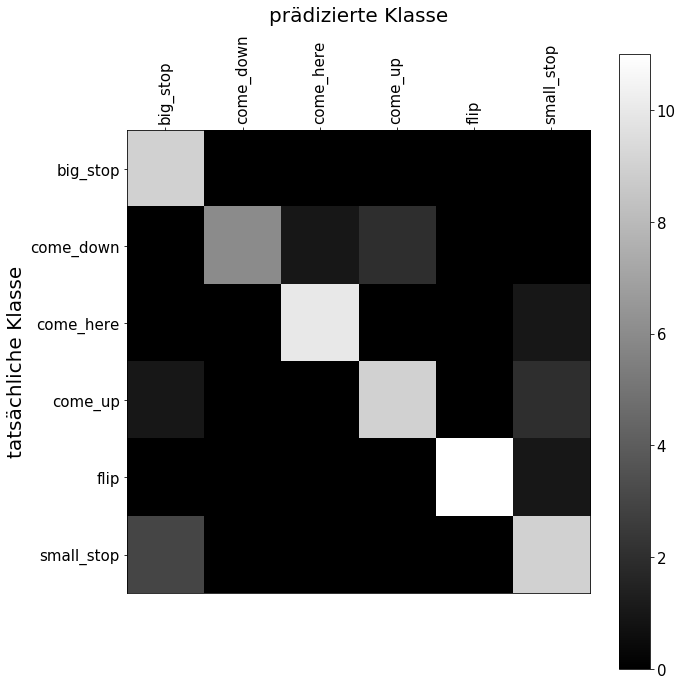

In [13]:
cm = confusion_matrix(acc_test_label, result)
labels = list(acc_svm.classes_)

print(cm)

print_confusion_matrix_colored(cm, labels, 20, 15)

In [15]:
clf_repo = classification_report(acc_test_label, result)

print(clf_repo)

parsed = parse_classification_report(clf_repo)
output = report_to_latex_table(parsed)
#print(output)

             precision    recall  f1-score   support

   big_stop       0.69      1.00      0.82         9
  come_down       1.00      0.67      0.80         9
  come_here       0.91      0.91      0.91        11
    come_up       0.82      0.75      0.78        12
       flip       1.00      0.92      0.96        12
 small_stop       0.69      0.75      0.72        12

avg / total       0.85      0.83      0.83        65



## Auswertung der optimalen Parameter - paper

In [36]:
#(0.53846153846153844, 5, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.44230769230769229, 7, {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.37820512820512819, 3, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.39743589743589741, 10, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'})

acc_frames = 5
acc_C = 1000
acc_kernel = 'linear'
acc_decfunc = 'ovo'

gyro_frames = 7
gyro_C = 100
gyro_kernel = 'linear'
gyro_decfunc = 'ovo'

ori_frames = 3
ori_C = 1000
ori_kernel = 'linear'
ori_decfunc = 'ovo'

emg_frames = 10
emg_C = 1000
emg_kernel = 'rbf'
emg_decfunc = 'ovo'

In [17]:
start_time = time.time()

train, valid, test = load_data_for_classification('paper')

acc_train_input, acc_train_label = prepare_data(train, acc_frames, 'accelerometer', verbose=False)
acc_valid_input, acc_valid_label = prepare_data(valid, acc_frames, 'accelerometer', verbose=False)
acc_test_input, acc_test_label = prepare_data(test, acc_frames, 'accelerometer', verbose=False)
print('Accelerometer data prepared')

gyro_train_input, gyro_train_label = prepare_data(train, gyro_frames, 'gyro', verbose=False)
gyro_valid_input, gyro_valid_label = prepare_data(valid, gyro_frames, 'gyro', verbose=False)
gyro_test_input, gyro_test_label = prepare_data(test, gyro_frames, 'gyro', verbose=False)
print('Gyroscope data prepared')

ori_train_input, ori_train_label = prepare_data(train, ori_frames, 'orientation', verbose=False)
ori_valid_input, ori_valid_label = prepare_data(valid, ori_frames, 'orientation', verbose=False)
ori_test_input, ori_test_label = prepare_data(test, ori_frames, 'orientation', verbose=False)
print('Orientation data prepared')

emg_train_input, emg_train_label = prepare_data(train, emg_frames, 'emg', verbose=False)
emg_valid_input, emg_valid_label = prepare_data(valid, emg_frames, 'emg', verbose=False)
emg_test_input, emg_test_label = prepare_data(test, emg_frames, 'emg', verbose=False)
print('EMG data prepared')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer data prepared
Gyroscope data prepared
Orientation data prepared
EMG data prepared

Duration: 73.4923460483551


In [18]:
start_time = time.time()

acc_svm = svm.SVC(C=acc_C, kernel=acc_kernel, decision_function_shape=acc_decfunc, random_state=random_seed, probability=True)
acc_svm.fit(np.append(acc_train_input, acc_valid_input, axis=0), np.append(acc_train_label, acc_valid_label))
print('Accelerometer classifier fitted')

gyro_svm = svm.SVC(C=gyro_C, kernel=gyro_kernel, decision_function_shape=gyro_decfunc, random_state=random_seed, probability=True)
gyro_svm.fit(np.append(gyro_train_input, gyro_valid_input, axis=0), np.append(gyro_train_label, gyro_valid_label))
print('Gyroscope classifier fitted')

ori_svm = svm.SVC(C=ori_C, kernel=ori_kernel, decision_function_shape=ori_decfunc, random_state=random_seed, probability=True)
ori_svm.fit(np.append(ori_train_input, ori_valid_input, axis=0), np.append(ori_train_label, ori_valid_label))
print('Orientation classifier fitted')

emg_svm = svm.SVC(C=emg_C, kernel=emg_kernel, decision_function_shape=emg_decfunc, random_state=random_seed, probability=True)
emg_svm.fit(np.append(emg_train_input, emg_valid_input, axis=0), np.append(emg_train_label, emg_valid_label))
print('EMG classifier fitted')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer classifier fitted
Gyroscope classifier fitted
Orientation classifier fitted
EMG classifier fitted

Duration: 8.536446809768677


In [37]:
frame_config ={'acc_frames':acc_frames, 'gyro_frames':gyro_frames, 'ori_frames':ori_frames, 'emg_frames':emg_frames}

save_path = '../Data/models/svm/'
os.makedirs(save_path, exist_ok=True)

#joblib.dump(acc_svm, save_path + 'paper_acc_svm.p')
#joblib.dump(gyro_svm, save_path + 'paper_gyro_svm.p')
#joblib.dump(ori_svm, save_path + 'paper_ori_svm.p')
#joblib.dump(emg_svm, save_path + 'paper_emg_svm.p')

joblib.dump(frame_config, save_path + 'paper_frame_config.p')

acc_svm = joblib.load(save_path + 'paper_acc_svm.p')
gyro_svm = joblib.load(save_path + 'paper_gyro_svm.p')
ori_svm = joblib.load(save_path + 'paper_ori_svm.p')
emg_svm = joblib.load(save_path + 'paper_emg_svm.p')

frame_config = joblib.load(save_path + 'paper_frame_config.p')

{'acc_frames': 5, 'gyro_frames': 7, 'ori_frames': 3, 'emg_frames': 10}


In [20]:
start_time = time.time()

acc_pred_probs = acc_svm.predict_proba(acc_test_input)
gyro_pred_probs = gyro_svm.predict_proba(gyro_test_input)
ori_pred_probs = ori_svm.predict_proba(ori_test_input)
emg_pred_probs = emg_svm.predict_proba(emg_test_input)

if (np.array_equal(acc_svm.classes_, gyro_svm.classes_) and 
    np.array_equal(gyro_svm.classes_, ori_svm.classes_) and
    np.array_equal(ori_svm.classes_, emg_svm.classes_)):
    
    result = []
    
    for prediction in range(len(acc_pred_probs)):
        acc_gyro = np.add(acc_pred_probs[prediction], gyro_pred_probs[prediction])
        ori_emg = np.add(ori_pred_probs[prediction], emg_pred_probs[prediction])
        final = np.divide(np.add(acc_gyro, ori_emg), 4)
        result.append(acc_svm.classes_[np.argmax(final)])
    
    #print(result)
    
else:
    print('Something went wrong!')

print('\nDuration: {}'.format(time.time() - start_time))


Duration: 0.09821772575378418


In [21]:
print(accuracy_score(acc_test_label, result))

0.324742268041


[[3 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 1]
 [0 5 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 4 0 0 2 0 0 1 0 0 0 0 0 2]
 [0 0 0 1 3 0 0 0 0 1 0 0 1 0 0 1 1 1]
 [0 3 0 0 4 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 2 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 3 0 0 2 0 0 3 0 0 1 0 0]
 [0 1 0 0 2 0 0 3 0 0 0 1 0 2 0 0 0 2]
 [0 0 0 0 0 0 2 0 3 1 0 1 1 0 4 0 0 0]
 [0 0 0 3 0 0 3 0 0 2 0 0 3 0 0 1 0 0]
 [0 2 0 0 0 0 0 2 0 0 6 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 0 0 3 0 0 0 0 0 6]
 [0 0 0 1 0 0 3 0 0 1 0 0 4 0 0 3 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 7 1 0 0 2]
 [0 0 0 0 0 3 1 0 0 0 0 0 0 0 5 0 0 3]
 [0 0 0 5 0 0 2 0 0 1 0 0 2 0 0 2 0 0]
 [0 3 0 0 1 0 0 1 0 0 5 0 0 0 0 0 2 0]
 [0 0 1 0 0 1 0 0 1 0 0 2 0 0 1 0 0 6]]


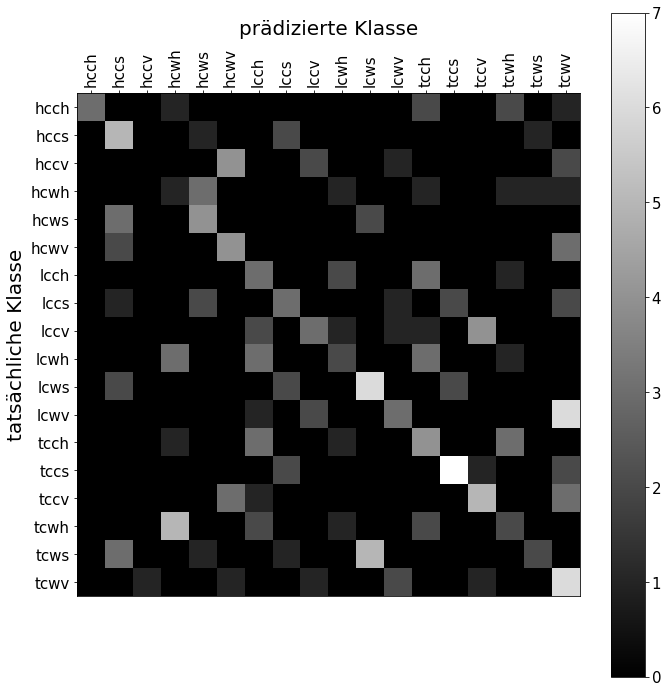

In [22]:
cm = confusion_matrix(acc_test_label, result)
labels = list(acc_svm.classes_)

print(cm)

print_confusion_matrix_colored(cm, labels, 20, 15)

In [23]:
clf_repo = classification_report(acc_test_label, result)

print(clf_repo)

parsed = parse_classification_report(clf_repo)
output = report_to_latex_table(parsed)
#print(output)

             precision    recall  f1-score   support

       hcch       1.00      0.33      0.50         9
       hccs       0.31      0.56      0.40         9
       hccv       0.00      0.00      0.00         9
       hcwh       0.09      0.11      0.10         9
       hcws       0.36      0.44      0.40         9
       hcwv       0.33      0.44      0.38         9
       lcch       0.20      0.33      0.25         9
       lccs       0.30      0.27      0.29        11
       lccv       0.38      0.25      0.30        12
       lcwh       0.25      0.17      0.20        12
       lcws       0.46      0.50      0.48        12
       lcwv       0.38      0.25      0.30        12
       tcch       0.25      0.33      0.29        12
       tccs       0.64      0.58      0.61        12
       tccv       0.45      0.42      0.43        12
       tcwh       0.20      0.17      0.18        12
       tcws       0.50      0.17      0.25        12
       tcwv       0.23      0.50      0.32   

## Auswertung der optimalen Parameter - all

In [38]:
#(0.57004830917874394, 6, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.46859903381642515, 12, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.46859903381642515, 3, {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'linear'})
#(0.46859903381642515, 11, {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'})

acc_frames = 6
acc_C = 1000
acc_kernel = 'linear'
acc_decfunc = 'ovo'

gyro_frames = 12
gyro_C = 1000
gyro_kernel = 'linear'
gyro_decfunc = 'ovo'

ori_frames = 3
ori_C = 1000
ori_kernel = 'linear'
ori_decfunc = 'ovo'

emg_frames = 11
emg_C = 100
emg_kernel = 'linear'
emg_decfunc = 'ovo'

In [25]:
start_time = time.time()

train, valid, test = load_data_for_classification('all')

acc_train_input, acc_train_label = prepare_data(train, acc_frames, 'accelerometer', verbose=False)
acc_valid_input, acc_valid_label = prepare_data(valid, acc_frames, 'accelerometer', verbose=False)
acc_test_input, acc_test_label = prepare_data(test, acc_frames, 'accelerometer', verbose=False)
print('Accelerometer data prepared')

gyro_train_input, gyro_train_label = prepare_data(train, gyro_frames, 'gyro', verbose=False)
gyro_valid_input, gyro_valid_label = prepare_data(valid, gyro_frames, 'gyro', verbose=False)
gyro_test_input, gyro_test_label = prepare_data(test, gyro_frames, 'gyro', verbose=False)
print('Gyroscope data prepared')

ori_train_input, ori_train_label = prepare_data(train, ori_frames, 'orientation', verbose=False)
ori_valid_input, ori_valid_label = prepare_data(valid, ori_frames, 'orientation', verbose=False)
ori_test_input, ori_test_label = prepare_data(test, ori_frames, 'orientation', verbose=False)
print('Orientation data prepared')

emg_train_input, emg_train_label = prepare_data(train, emg_frames, 'emg', verbose=False)
emg_valid_input, emg_valid_label = prepare_data(valid, emg_frames, 'emg', verbose=False)
emg_test_input, emg_test_label = prepare_data(test, emg_frames, 'emg', verbose=False)
print('EMG data prepared')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer data prepared
Gyroscope data prepared
Orientation data prepared
EMG data prepared

Duration: 98.56366395950317


In [26]:
start_time = time.time()

acc_svm = svm.SVC(C=acc_C, kernel=acc_kernel, decision_function_shape=acc_decfunc, random_state=random_seed, probability=True)
acc_svm.fit(np.append(acc_train_input, acc_valid_input, axis=0), np.append(acc_train_label, acc_valid_label))
print('Accelerometer classifier fitted')

gyro_svm = svm.SVC(C=gyro_C, kernel=gyro_kernel, decision_function_shape=gyro_decfunc, random_state=random_seed, probability=True)
gyro_svm.fit(np.append(gyro_train_input, gyro_valid_input, axis=0), np.append(gyro_train_label, gyro_valid_label))
print('Gyroscope classifier fitted')

ori_svm = svm.SVC(C=ori_C, kernel=ori_kernel, decision_function_shape=ori_decfunc, random_state=random_seed, probability=True)
ori_svm.fit(np.append(ori_train_input, ori_valid_input, axis=0), np.append(ori_train_label, ori_valid_label))
print('Orientation classifier fitted')

emg_svm = svm.SVC(C=emg_C, kernel=emg_kernel, decision_function_shape=emg_decfunc, random_state=random_seed, probability=True)
emg_svm.fit(np.append(emg_train_input, emg_valid_input, axis=0), np.append(emg_train_label, emg_valid_label))
print('EMG classifier fitted')

print('\nDuration: {}'.format(time.time() - start_time))

Accelerometer classifier fitted
Gyroscope classifier fitted
Orientation classifier fitted
EMG classifier fitted

Duration: 13.430511236190796


In [39]:
frame_config ={'acc_frames':acc_frames, 'gyro_frames':gyro_frames, 'ori_frames':ori_frames, 'emg_frames':emg_frames}

save_path = '../Data/models/svm/'
os.makedirs(save_path, exist_ok=True)

#joblib.dump(acc_svm, save_path + 'all_acc_svm.p')
#joblib.dump(gyro_svm, save_path + 'all_gyro_svm.p')
#joblib.dump(ori_svm, save_path + 'all_ori_svm.p')
#joblib.dump(emg_svm, save_path + 'all_emg_svm.p')

joblib.dump(frame_config, save_path + 'all_frame_config.p')

acc_svm = joblib.load(save_path + 'all_acc_svm.p')
gyro_svm = joblib.load(save_path + 'all_gyro_svm.p')
ori_svm = joblib.load(save_path + 'all_ori_svm.p')
emg_svm = joblib.load(save_path + 'all_emg_svm.p')

frame_config = joblib.load(save_path + 'all_frame_config.p')

{'acc_frames': 6, 'gyro_frames': 12, 'ori_frames': 3, 'emg_frames': 11}


In [28]:
start_time = time.time()

acc_pred_probs = acc_svm.predict_proba(acc_test_input)
gyro_pred_probs = gyro_svm.predict_proba(gyro_test_input)
ori_pred_probs = ori_svm.predict_proba(ori_test_input)
emg_pred_probs = emg_svm.predict_proba(emg_test_input)

if (np.array_equal(acc_svm.classes_, gyro_svm.classes_) and 
    np.array_equal(gyro_svm.classes_, ori_svm.classes_) and
    np.array_equal(ori_svm.classes_, emg_svm.classes_)):
    
    result = []
    
    for prediction in range(len(acc_pred_probs)):
        acc_gyro = np.add(acc_pred_probs[prediction], gyro_pred_probs[prediction])
        ori_emg = np.add(ori_pred_probs[prediction], emg_pred_probs[prediction])
        final = np.divide(np.add(acc_gyro, ori_emg), 4)
        result.append(acc_svm.classes_[np.argmax(final)])
    
    #print(result)
    
else:
    print('Something went wrong!')

print('\nDuration: {}'.format(time.time() - start_time))


Duration: 0.20405793190002441


In [29]:
print(accuracy_score(acc_test_label, result))

0.467181467181


[[7 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 7 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 5 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0]
 [0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 4 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 1 0 0 3 0 0 2 0 0 2 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 3 2 0 1 0 0 0 0 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 2 0 0 6 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 3 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 1 0 0 1 0 0 7 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 1 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 5 0 1 0 2 0 0 3]
 [0 0 0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 3 0 1 1 0 0]
 [0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 4 0 0 0 1 0 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 5 0 0 0 0 0 0 5]
 [1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 3 0 0 3 0 0]
 [0 2 0 0 0 0 1 0 0 0 0 0 1 0 0

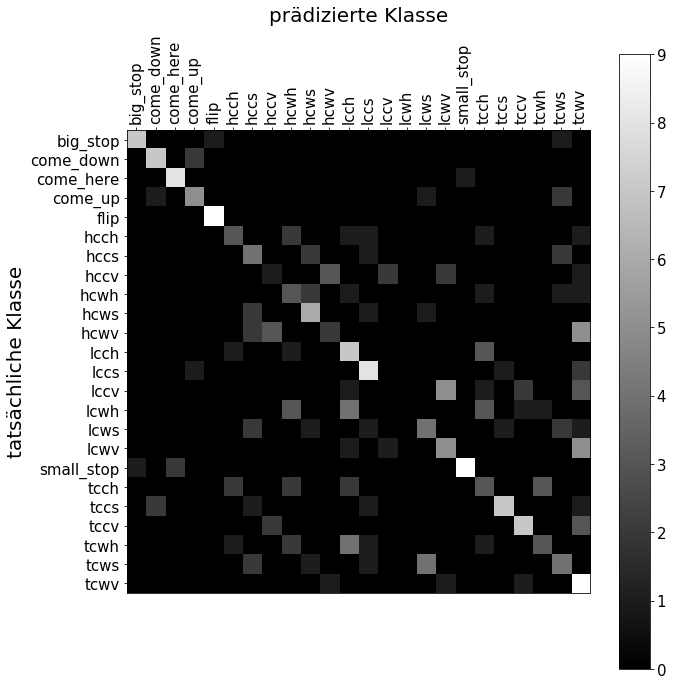

In [30]:
cm = confusion_matrix(acc_test_label, result)
labels = list(acc_svm.classes_)

print(cm)

print_confusion_matrix_colored(cm, labels, 20, 15)

In [31]:
clf_repo = classification_report(acc_test_label, result)

print(clf_repo)

parsed = parse_classification_report(clf_repo)
output = report_to_latex_table(parsed)
#print(output)

             precision    recall  f1-score   support

   big_stop       0.88      0.78      0.82         9
  come_down       0.70      0.78      0.74         9
  come_here       0.80      0.89      0.84         9
    come_up       0.62      0.56      0.59         9
       flip       0.90      1.00      0.95         9
       hcch       0.43      0.33      0.38         9
       hccs       0.31      0.44      0.36         9
       hccv       0.17      0.11      0.13         9
       hcwh       0.23      0.33      0.27         9
       hcws       0.50      0.60      0.55        10
       hcwv       0.33      0.17      0.22        12
       lcch       0.33      0.58      0.42        12
       lccs       0.53      0.67      0.59        12
       lccv       0.00      0.00      0.00        12
       lcwh       0.00      0.00      0.00        12
       lcws       0.40      0.33      0.36        12
       lcwv       0.38      0.42      0.40        12
 small_stop       0.90      0.75      0.82   

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
